In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [23]:
ds = pd.read_csv('Housing.csv')
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
print(ds.shape)

(545, 13)


In [25]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [26]:
for col in ds.columns:
    print(col,':',ds[col].nunique())

price : 219
area : 284
bedrooms : 6
bathrooms : 4
stories : 4
mainroad : 2
guestroom : 2
basement : 2
hotwaterheating : 2
airconditioning : 2
parking : 4
prefarea : 2
furnishingstatus : 3


In [27]:
print(ds.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [28]:
print('Null value in each columns ')
print(ds.isnull().sum())

Null value in each columns 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [29]:
print('Total null values in dataset :', ds.isnull().sum().sum())

Total null values in dataset : 0


In [30]:
print('Total duplicate values in dataset :', ds.duplicated().sum())

Total duplicate values in dataset : 0


In [31]:
for col in ds.columns:
  if ds[col].dtype == 'object':
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])
    print(col, le.classes_)

mainroad ['no' 'yes']
guestroom ['no' 'yes']
basement ['no' 'yes']
hotwaterheating ['no' 'yes']
airconditioning ['no' 'yes']
prefarea ['no' 'yes']
furnishingstatus ['furnished' 'semi-furnished' 'unfurnished']


In [32]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [34]:
ds.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [35]:
correlation = ds.corr()

<Axes: >

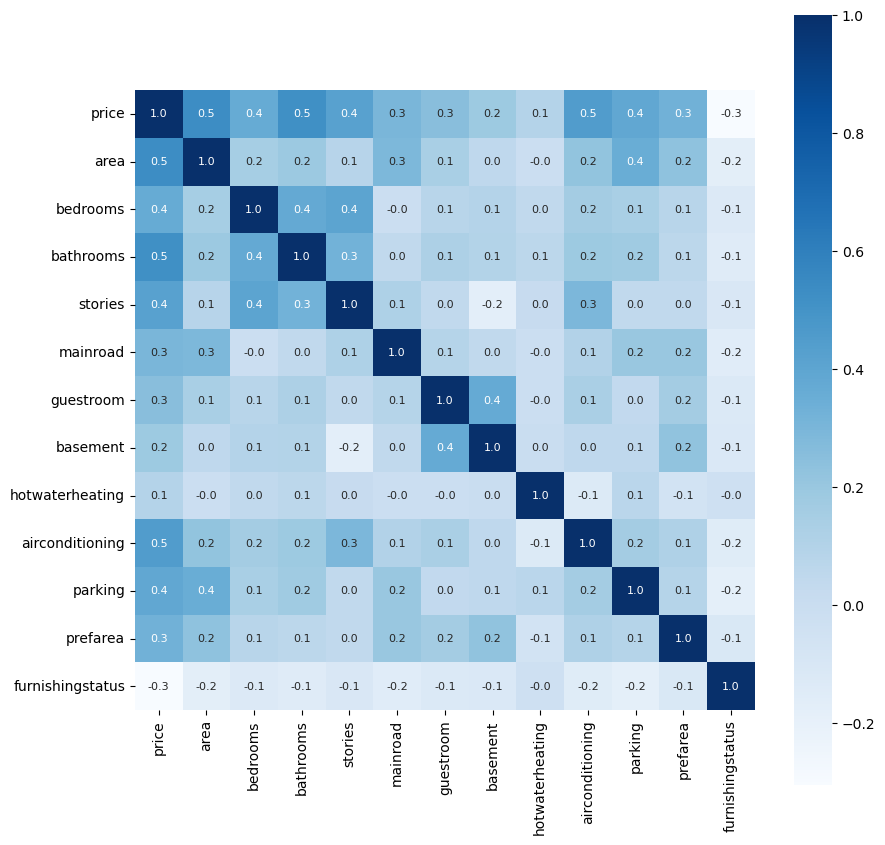

In [36]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [37]:
# Spliting the data and target
X = ds.drop(['price'], axis=1)
Y = ds['price']

In [38]:
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(545, 12) (436, 12) (109, 12)


In [41]:
# loading the model
model = XGBRegressor()

In [42]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Prediction on training data

In [43]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [44]:
print(training_data_prediction)

[ 3424222.   4270767.   2683287.   4791449.5  4129676.   6953162.
  2877948.2  2689605.   6933238.   4681389.5  3316203.8  2900007.8
  6003467.   5804279.   7766756.5  4123577.   5245065.   4591470.5
  7756017.5  4219297.5  4168722.2  2690382.2  5239920.5  4396851.
  3918579.2  4042381.   6799842.   9215863.   4642376.5  3237656.8
  3760464.   3075951.5  2362834.5  4035899.   4268145.   2839288.5
  4858737.5  3643904.8  1921622.5  7990241.5  4081057.2 12234883.
  8546704.   7393369.5  4020822.8  3205431.8  4303169.   3587664.
  3376537.5  2473200.5  5921071.   4051300.5  3857848.8  3180712.2
  4045365.2  5352052.   3652279.5  3790807.5  3622467.8  4138339.
  7544263.   4306240.5  5928919.   2996695.5  3796975.8  5526313.
  6702700.5  5857141.5  5406529.5  5620276.   3333574.2  3630378.8
  2862753.5  4958216.   5244960.5  3710378.8  5884058.   4211315.5
  6746079.5  5397818.   3119843.2  3564199.8  6575148.   4889165.5
  5866716.5  8390791.   2687594.   3291622.2  9790258.   4098177.5
 

In [45]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9968795776367188
Mean Absolute Error :  59136.664277522934


## Visualizing the actual Prices and predicted prices

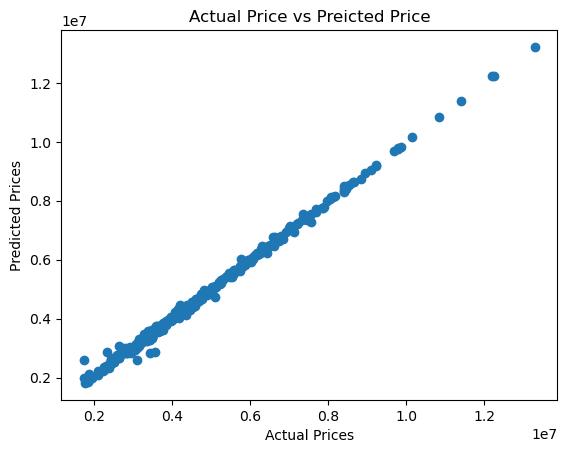

In [46]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

## Prediction on test data

In [47]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [48]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.4463416337966919
Mean Absolute Error :  948763.2901376147
